# Objective:
The objective is to build a machine learning model that can assist in 
diagnosing breast cancer tumors with high accuracy. By leveraging the available
dataset containing features such as radius, texture, smoothness, compactness,
etc., extracted from digitized images of breast mass samples, the goal is to 
develop a model that can classify tumors into malignant or benign categories 
based on these features

# Problem
 
The problem is to develop a predictive model that can accurately classify breast cancer tumors as either malignant (cancerous) or benign (non-cancerous) based on features extracted from diagnostic images

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Import the dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
df= load_breast_cancer()

In [10]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Early Observations
1. The dataset contains both the data and the target variables.
2. The target consists of binary labels:0&1, where 0 represents benign tumors and 1 representing the malignant tumor
3. The target variables has corresponding target name as "malignant" and "benign"
4. The dataset inclydes a comprehensive list of features which represent the various characteristics and attrubutes extracted from the digitized images of breast mass samples. Features include  mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc

In [11]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
dataset.columns=df.feature_names
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [15]:
## Independent features and dependent features
X=dataset
y=df.target

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [65]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=2)

In [66]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.013690,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.10300,0.06219,0.04580,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.13220,0.56010,0.38650,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.22260,0.52090,0.46460,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.21230,0.09861,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592


In [24]:
#Importing the linear_regression
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [28]:
X_train=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [32]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Accuracy 

In [42]:
#Mean-squared-error
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=17)

In [43]:
np.mean(mse)

-0.06241839786653542

In [71]:
##prediction 
reg_predict=regression.predict(X_test)


C:\Users\ossum\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [72]:
reg_predict


array([ 261.17489722,  333.27780721,  156.17285636, 1080.90260791,
        369.31617071,  879.27901024,  226.81112695,  259.23521238,
        230.13707855,  307.06122404,  454.05009094,  214.55953685,
        185.31617945,  271.50941164,  206.67766282,  649.79390156,
        186.60964595,  180.07318526,  220.6922958 ,  779.05778178,
        155.30581337,  198.69662171,  238.49267533,  220.09730109,
        306.48720753,  721.88632411,  280.75461013,  358.4273361 ,
        876.16853143,  784.58183229,  395.94290741,  234.97033439,
        254.96954182, 1682.55064706,  690.69830642,  217.94938545,
        244.87504183,  338.6581315 ,  144.68965513,  142.98550899,
        811.96590294,  550.58668229,  172.28839672,  155.0191969 ,
        372.21635191,  199.55338425,  108.63781661,  170.61179006,
       1508.42792746,  658.63009416,  334.29726249,  555.30540188,
        421.05664411,  208.81697518,  148.64061894,  428.32271892,
        227.69142668,  146.32292969,  243.10128251,  182.63925

C:\Users\ossum\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


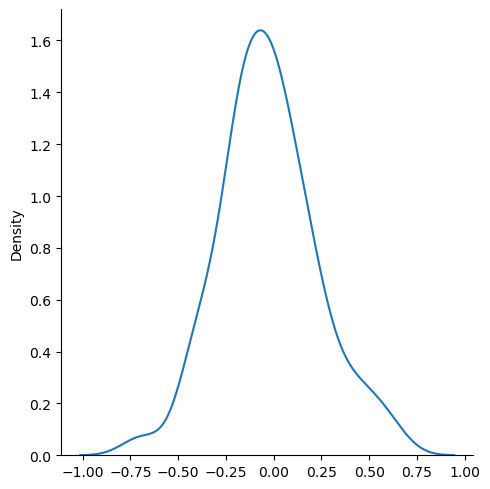

In [53]:
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

In [60]:
from sklearn.metrics import r2_score

In [59]:
score=r2_score(reg_predict,y_test)

In [58]:
score

0.6849392270326469